In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('../peptidome.mplstyle')

import sys
sys.path.append('..')
from lib import *

In [48]:
df = load_proteome_as_df('Human')
print('complete length', '%e'%np.sum(df['Sequence'].str.len()))
print('multiple seqs', len(df['Sequence'])-len(df['Sequence'].unique()))
df.drop_duplicates(subset=['Sequence'], inplace=True)

df_clustered = load_proteome_as_df_path(datadir+'cluster/UP000005640Human_rep_seq.fasta')
print('>.9 identity', len(df)-len(df_clustered),
      '%e'%(np.sum(df['Sequence'].str.len())-np.sum(df_clustered['Sequence'].str.len())))


df_clustered_50 = load_proteome_as_df_path(datadir+'cluster/UP000005640Human_50_rep_seq.fasta')
print('>.5 identity', len(df_clustered)-len(df_clustered_50),
      '%e'%(np.sum(df_clustered['Sequence'].str.len())-np.sum(df_clustered_50['Sequence'].str.len())))

complete length 1.151849e+07
multiple seqs 66
>.9 identity 1289 4.566740e+05
>.5 identity 3486 1.973860e+06


# uniref viruses
df = load_unirefproteome_as_df_path(datadir + 'human-viruses-uniref90.fasta')
print('complete length', '%e'%np.sum(df['Sequence'].str.len()))

In [3]:
def to_kmers_nonoverlapping(seqs, k):
    for seq in seqs:
         for i in range((len(seq)-k+1)//k):
                s = seq[k*i:k*(i+1)]
                if isvalidaa(s):
                    yield s

In [50]:
fragmentlength = 40
fragments = [kmer for kmer in to_kmers_nonoverlapping(df['Sequence'], fragmentlength)]
df_fragments = pd.DataFrame(dict(identifier=[str(i) for i in range(len(fragments))],
                                 Sequence=fragments))

In [51]:
'%e'%(len(fragments)*fragmentlength)

'1.026780e+07'

In [52]:
write_fasta(df_fragments, 'fragments.fasta.gz', seqcolumn='Sequence', idcolumn='identifier')

In [53]:
!mmseqs easy-cluster fragments.fasta.gz fragments_50 tmp --min-seq-id 0.5 -c 0.8 --cov-mode 0

easy-cluster fragments.fasta.gz fragments_50 tmp --min-seq-id 0.5 -c 0.8 --cov-mode 0 

MMseqs Version:                     	12.113e3
Substitution matrix                 	nucl:nucleotide.out,aa:blosum62.out
Seed substitution matrix            	nucl:nucleotide.out,aa:VTML80.out
Sensitivity                         	4
k-mer length                        	0
k-score                             	2147483647
Alphabet size                       	nucl:5,aa:21
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	0
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                       	1
Mask lower case residues            	0
Minimum diagonal score              	15
Include identical seq. id.  

[256642] 0s 166ms
Time for merging to input_h: 0h 0m 0s 2ms
Time for merging to input: 0h 0m 0s 4ms
Database type: Aminoacid
Time for processing: 0h 0m 0s 188ms
Tmp tmp/10998268439393378155/clu_tmp folder does not exist or is not a directory.
Create dir tmp/10998268439393378155/clu_tmp
cluster tmp/10998268439393378155/input tmp/10998268439393378155/clu tmp/10998268439393378155/clu_tmp --max-seqs 20 -c 0.8 --cov-mode 0 --spaced-kmer-mode 1 --alignment-mode 3 -e 0.001 --min-seq-id 0.5 --remove-tmp-files 1 

Set cluster sensitivity to -s 3.000000
Set cluster mode SET COVER
Set cluster iterations to 3
linclust tmp/10998268439393378155/input tmp/10998268439393378155/clu_tmp/11022494509857216909/clu_redundancy tmp/10998268439393378155/clu_tmp/11022494509857216909/linclust --cluster-mode 0 --max-iterations 1000 --similarity-type 2 --threads 8 --compressed 0 -v 3 --sub-mat nucl:nucleotide.out,aa:blosum62.out -a 0 --alignment-mode 3 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.5 --min-aln-len 0 

Clustering mode: Set Cover
[=================================================================] 100.00% 221.70K 0s 25ms
Sort entries
Find missing connections
Found 767 new connections.
Reconstruct initial order


[=================================================================] 100.00% 221.70K 0s 25ms
Add missing connections
[=================================================================] 100.00% 221.70K 0s 6ms

Time for read in: 0h 0m 0s 75ms
Total time: 0h 0m 0s 93ms

Size of the sequence database: 221696
Size of the alignment database: 221696
Number of clusters: 220962



Writing results 0h 0m 0s 31ms
Time for merging to clust: 0h 0m 0s 0ms
Time for processing: 0h 0m 0s 168ms
mergeclusters tmp/10998268439393378155/input tmp/10998268439393378155/clu_tmp/11022494509857216909/clu_redundancy tmp/10998268439393378155/clu_tmp/11022494509857216909/linclust/4820903221486824949/pre_clust tmp/10998268439393378155/clu_tmp/11022494509857216909/linclust/4820903221486824949/clust --threads 8 --compressed 0 -v 3 

Clustering step 1
[=================================================================] 100.00% 221.70K 0s 36ms     
Clustering step 2
[=================================================================] 100.00% 220.96K 0s 96ms     
Write merged clustering
[=================================================================] 100.00% 256.70K 0s 136ms    
Time for merging to clu_redundancy: 0h 0m 0s 93ms
Time for processing: 0h 0m 0s 270ms
rmdb tmp/10998268439393378155/clu_tmp/11022494509857216909/linclust/4820903221486824949/pref -v 3 

Time for processing: 0h 0m 

[=================================================================] 100.00% 214.68K 3s 284ms    

5.879768 k-mers per position
33 DB matches per sequence
0 overflows
0 queries produce too many hits (truncated result)
1 sequences passed prefiltering per query sequence
1 median result list length
0 sequences with 0 size result lists
Time for merging to pref_step1: 0h 0m 0s 45ms
Time for processing: 0h 0m 5s 325ms
align tmp/10998268439393378155/clu_tmp/11022494509857216909/input_step1 tmp/10998268439393378155/clu_tmp/11022494509857216909/input_step1 tmp/10998268439393378155/clu_tmp/11022494509857216909/pref_step1 tmp/10998268439393378155/clu_tmp/11022494509857216909/aln_step1 --sub-mat nucl:nucleotide.out,aa:blosum62.out -a 0 --alignment-mode 3 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.5 --min-aln-len 0 --seq-id-mode 0 --alt-ali 0 -c 0.8 --cov-mode 0 --max-seq-len 65535 --comp-bias-corr 1 --realign 0 --max-rejected 2147483647 --max-accept 2147483647 --add-self-matches 0 --db-load-mode 0

Time for processing: 0h 0m 0s 1ms
rmdb tmp/10998268439393378155/clu_tmp/11022494509857216909/aln_step2 -v 3 

Time for processing: 0h 0m 0s 2ms
rmdb tmp/10998268439393378155/clu_tmp/11022494509857216909/clu_step2 -v 3 

Time for processing: 0h 0m 0s 0ms
rmdb tmp/10998268439393378155/clu_tmp/11022494509857216909/input_step1 -v 3 

Time for processing: 0h 0m 0s 0ms
rmdb tmp/10998268439393378155/clu_tmp/11022494509857216909/input_step2 -v 3 

Time for processing: 0h 0m 0s 0ms
createtsv tmp/10998268439393378155/input tmp/10998268439393378155/input tmp/10998268439393378155/clu tmp/10998268439393378155/cluster.tsv --threads 8 -v 3 

Time for merging to cluster.tsv: 0h 0m 0s 81ms
Time for processing: 0h 0m 0s 277ms
result2repseq tmp/10998268439393378155/input tmp/10998268439393378155/clu tmp/10998268439393378155/clu_rep --threads 8 -v 3 

[=================================================================] 100.00% 208.42K 0s 42ms     
Time for merging to clu_rep: 0h 0m 0s 75ms
Time for process

In [54]:
df_fragments_clustered = load_proteome_as_df_path('fragments_50_rep_seq.fasta',
                                                  parse_genes=False, parse_accessions=False)
print('fragment clustered length', '%e'%np.sum(df_fragments_clustered['Sequence'].str.len()))

fragment clustered length 8.336800e+06


In [55]:
def counter_to_series(counter):
    count_df = pd.DataFrame.from_dict(counter, orient='index', columns=['count'])
    count_series = count_df.T.squeeze()
    return count_series
def fraction_multiple(series):
    return np.sum(series[series>1])/np.sum(series)

In [56]:
k = 9
filterlength = 12

In [57]:
for d in [#df,
          #df_clustered,# df_clustered_50,
          df_fragments_clustered]:
    count_series = counter_to_series(count_kmers_iterable(d['Sequence'], k, clean=True))
    count_series_unique = counter_to_series(
                       count_kmers_iterable(
                           filter_unique(d['Sequence'], k, filterlength),
                           k)
                       )
    print(fraction_multiple(count_series), fraction_multiple(count_series_unique))

0.023555800786872663 0.006866395552239293


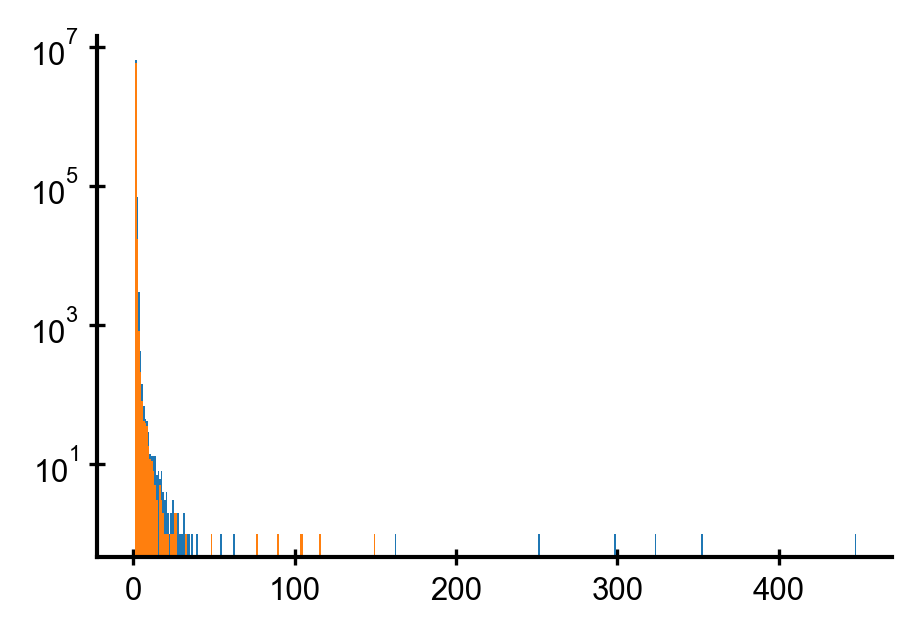

In [58]:
counts, bins, _ = plt.hist(count_series, log=True,
                           bins=np.arange(0, count_series.max()+1, 1));
plt.hist(count_series_unique, log=True, bins=bins);
#plt.xscale('log')

In [59]:
counts = count_series_unique

In [60]:
2*np.sum(scipy.special.binom(counts[counts>1], 2))/np.sum(counts)**2

3.758576619974231e-09

In [61]:
'{:.3e}, {:.3e}'.format(np.sum(count_series), np.sum(count_series_unique))

'6.669e+06, 6.001e+06'

In [62]:
count_series.sort_values().tail(50)

LLPLLLLLL     16
EEDEEEEEE     16
SSSSSSSSA     17
GEEEEEEEE     17
PPPPPLPPP     17
EEEDEEEEE     17
LLLLLLLLP     17
PPPPPPPAP     17
SEEEEEEEE     17
LPPPPPPPP     17
EEEEEEDEE     18
ASSSSSSSS     18
VAAAAAAAA     18
QQQQQQQQP     18
EEEEEEEDE     19
GRGRGRGRG     19
EDEEEEEEE     19
RERERERER     20
EEEEEEEEG     20
AAAAAAAAV     20
GGGGGGGGA     20
APPPPPPPP     21
PPPPPPLPP     21
QPPPPPPPP     22
PLLLLLLLL     23
DDDDDDDDD     23
PAPAPAPAP     24
AQAQAQAQA     24
SGGGGGGGG     24
QAQAQAQAQ     25
AAAAAAAAG     25
PPPPPPPLP     27
APAPAPAPA     27
DEEEEEEEE     28
AAAAAAAAS     29
PPPPPPPPA     30
SAAAAAAAA     31
PPPPPPPPL     31
EEEEEEEED     33
PGPPGPPGP     34
PPGPPGPPG     36
GPPGPPGPP     39
LLLLLLLLL     54
HHHHHHHHH     62
GGGGGGGGG    162
PPPPPPPPP    251
EEEEEEEEE    298
SSSSSSSSS    323
AAAAAAAAA    352
QQQQQQQQQ    448
Name: count, dtype: int64

In [63]:
count_series_unique.sort_values().tail(20)

SGGGGGGGG     17
PPPPPPPLP     18
EEEEEEEEG     18
PGPPGPPGP     19
PLLLLLLLL     20
AAAAAAAAG     21
PPPPPPPPL     23
EEEEEEEED     24
PPPPPPPPA     25
AAAAAAAAS     25
PPGPPGPPG     26
GPPGPPGPP     26
HHHHHHHHH     32
LLLLLLLLL     48
GGGGGGGGG     76
QQQQQQQQQ     89
SSSSSSSSS    103
PPPPPPPPP    104
EEEEEEEEE    115
AAAAAAAAA    149
Name: count, dtype: int64